In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('../Incidence of myeloma in AYA population Excel format.slm.csv')

In [3]:
data

,Age recode with <1 year olds,Sex,Year of diagnosis,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Site recode ICD-O-3/WHO 2008,Survival months,Type of Reporting Source,Patient ID
0,35-39 years,Female,2001,Hispanic (All Races),Myeloma,160,Hospital inpatient/outpatient or clinic,802609
1,30-34 years,Male,2000,Hispanic (All Races),Myeloma,188,Hospital inpatient/outpatient or clinic,835763
2,25-29 years,Male,2000,Non-Hispanic White,Myeloma,67,Hospital inpatient/outpatient or clinic,841523
3,35-39 years,Male,2000,Non-Hispanic Asian or Pacific Islander,Myeloma,30,Hospital inpatient/outpatient or clinic,851570
4,30-34 years,Male,2002,Hispanic (All Races),Myeloma,182,Hospital inpatient/outpatient or clinic,871996
...,...,...,...,...,...,...,...,...
1415,30-34 years,Female,2017,Non-Hispanic Black,Myeloma,6,Hospital inpatient/outpatient or clinic,75793558
1416,35-39 years,Male,2017,Non-Hispanic White,Myeloma,0,Hospital inpatient/outpatient or clinic,75802472
1417,35-39 years,Female,2017,Non-Hispanic Black,Myeloma,3,Hospital inpatient/outpatient or clinic,75817427
1418,35-39 years,Female,2017,Non-Hispanic Black,Myeloma,1,Hospital inpatient/outpatient or clinic,75819452


In [11]:
num_cases = {} # maps year to number of cases
for year in range(2000, 2018):
    case_mask = data['Year of diagnosis'] == year
    num_cases[year] = data[case_mask]['Sex'].count()

In [12]:
num_cases

{2000: 77,
 2001: 91,
 2002: 66,
 2003: 72,
 2004: 75,
 2005: 78,
 2006: 60,
 2007: 70,
 2008: 73,
 2009: 73,
 2010: 73,
 2011: 100,
 2012: 77,
 2013: 102,
 2014: 77,
 2015: 79,
 2016: 90,
 2017: 87}

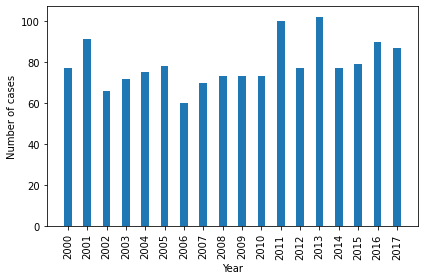

In [35]:
X_vals = list(range(2000, 2018))
Y_vals = [num_cases[key] for key in X_vals]

# label_loc = np.arange(len(X_vals))
label_loc = [i for i in range(0, len(X_vals)*2, 2)]
width = 0.35

fig1, ax1 = plt.subplots()
rect = ax1.bar(label_loc, height=Y_vals)
# plt.bar(X_vals, Y_vals)
ax1.set_ylabel('Number of cases')
ax1.set_xlabel('Year')
ax1.set_xticks(label_loc)
ax1.set_xticklabels(X_vals, rotation='vertical')
plt.tight_layout()
plt.savefig('Cases_per_yr.png')
plt.show()

In [37]:
female_mask = data['Sex'] == 'Female'
num_females = data[female_mask]['Sex'].count()
male_mask = data['Sex'] == 'Male'
num_males = data[male_mask]['Sex'].count()

In [38]:
print(num_females, num_males)

569 851


In [40]:
print("There are", round(num_females * 100/(num_females+ num_males), 2), "% females")

There are 40.07 % females


In [47]:
non_zero_mask = data['Survival months'] != '0' 
df = data[non_zero_mask]

In [48]:
df

,Age recode with <1 year olds,Sex,Year of diagnosis,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Site recode ICD-O-3/WHO 2008,Survival months,Type of Reporting Source,Patient ID
0,35-39 years,Female,2001,Hispanic (All Races),Myeloma,160,Hospital inpatient/outpatient or clinic,802609
1,30-34 years,Male,2000,Hispanic (All Races),Myeloma,188,Hospital inpatient/outpatient or clinic,835763
2,25-29 years,Male,2000,Non-Hispanic White,Myeloma,67,Hospital inpatient/outpatient or clinic,841523
3,35-39 years,Male,2000,Non-Hispanic Asian or Pacific Islander,Myeloma,30,Hospital inpatient/outpatient or clinic,851570
4,30-34 years,Male,2002,Hispanic (All Races),Myeloma,182,Hospital inpatient/outpatient or clinic,871996
...,...,...,...,...,...,...,...,...
1414,30-34 years,Male,2017,Non-Hispanic Black,Myeloma,3,Hospital inpatient/outpatient or clinic,75783116
1415,30-34 years,Female,2017,Non-Hispanic Black,Myeloma,6,Hospital inpatient/outpatient or clinic,75793558
1417,35-39 years,Female,2017,Non-Hispanic Black,Myeloma,3,Hospital inpatient/outpatient or clinic,75817427
1418,35-39 years,Female,2017,Non-Hispanic Black,Myeloma,1,Hospital inpatient/outpatient or clinic,75819452


In [43]:
data['Survival months'].dtype

dtype('O')

In [50]:
# df['Survival months int'] = df['Survival months'].astype(int, errors='ignore')

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df['Survival months int']

0       160
1       188
2        67
3        30
4       182
       ... 
1414      3
1415      6
1417      3
1418      1
1419     11
Name: Survival months int, Length: 1388, dtype: object

In [52]:
df['Survival months int'] = pd.to_numeric(df['Survival months'], errors='coerce')

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df['Survival months int']

0       160.0
1       188.0
2        67.0
3        30.0
4       182.0
        ...  
1414      3.0
1415      6.0
1417      3.0
1418      1.0
1419     11.0
Name: Survival months int, Length: 1388, dtype: float64

In [54]:
df.dropna(subset=['Survival months int'])

,Age recode with <1 year olds,Sex,Year of diagnosis,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Site recode ICD-O-3/WHO 2008,Survival months,Type of Reporting Source,Patient ID,Survival months int
0,35-39 years,Female,2001,Hispanic (All Races),Myeloma,160,Hospital inpatient/outpatient or clinic,802609,160.0
1,30-34 years,Male,2000,Hispanic (All Races),Myeloma,188,Hospital inpatient/outpatient or clinic,835763,188.0
2,25-29 years,Male,2000,Non-Hispanic White,Myeloma,67,Hospital inpatient/outpatient or clinic,841523,67.0
3,35-39 years,Male,2000,Non-Hispanic Asian or Pacific Islander,Myeloma,30,Hospital inpatient/outpatient or clinic,851570,30.0
4,30-34 years,Male,2002,Hispanic (All Races),Myeloma,182,Hospital inpatient/outpatient or clinic,871996,182.0
...,...,...,...,...,...,...,...,...,...
1414,30-34 years,Male,2017,Non-Hispanic Black,Myeloma,3,Hospital inpatient/outpatient or clinic,75783116,3.0
1415,30-34 years,Female,2017,Non-Hispanic Black,Myeloma,6,Hospital inpatient/outpatient or clinic,75793558,6.0
1417,35-39 years,Female,2017,Non-Hispanic Black,Myeloma,3,Hospital inpatient/outpatient or clinic,75817427,3.0
1418,35-39 years,Female,2017,Non-Hispanic Black,Myeloma,1,Hospital inpatient/outpatient or clinic,75819452,1.0


In [56]:
female_data = df[female_mask]
male_data = df[male_mask]

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [62]:
surv_females = female_data['Survival months int']
surv_males = male_data['Survival months int']

In [58]:
female_data['Survival months int'].mean()

69.20900900900901

In [59]:
male_data['Survival months int'].mean()

72.8621523579202

In [60]:
female_data['Survival months int'].median()

57.0

In [61]:
male_data['Survival months int'].median()

60.0

In [63]:
min(surv_females), max(surv_females)

(1.0, 214.0)

In [64]:
min(surv_males), max(surv_males)

(1.0, 215.0)

In [68]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [71]:
calculate_pvalues(df[['Sex', 'Survival months int']])

,Survival months int
Survival months int,0


In [ ]:
pearsonr()

In [73]:
df['Sex int'] = (df['Sex'] == 'Female').astype(int)

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
df

,Age recode with <1 year olds,Sex,Year of diagnosis,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Site recode ICD-O-3/WHO 2008,Survival months,Type of Reporting Source,Patient ID,Survival months int,Sex int
0,35-39 years,Female,2001,Hispanic (All Races),Myeloma,160,Hospital inpatient/outpatient or clinic,802609,160.0,1
1,30-34 years,Male,2000,Hispanic (All Races),Myeloma,188,Hospital inpatient/outpatient or clinic,835763,188.0,0
2,25-29 years,Male,2000,Non-Hispanic White,Myeloma,67,Hospital inpatient/outpatient or clinic,841523,67.0,0
3,35-39 years,Male,2000,Non-Hispanic Asian or Pacific Islander,Myeloma,30,Hospital inpatient/outpatient or clinic,851570,30.0,0
4,30-34 years,Male,2002,Hispanic (All Races),Myeloma,182,Hospital inpatient/outpatient or clinic,871996,182.0,0
...,...,...,...,...,...,...,...,...,...,...
1414,30-34 years,Male,2017,Non-Hispanic Black,Myeloma,3,Hospital inpatient/outpatient or clinic,75783116,3.0,0
1415,30-34 years,Female,2017,Non-Hispanic Black,Myeloma,6,Hospital inpatient/outpatient or clinic,75793558,6.0,1
1417,35-39 years,Female,2017,Non-Hispanic Black,Myeloma,3,Hospital inpatient/outpatient or clinic,75817427,3.0,1
1418,35-39 years,Female,2017,Non-Hispanic Black,Myeloma,1,Hospital inpatient/outpatient or clinic,75819452,1.0,1


In [78]:
df = df.dropna(subset=['Sex int', 'Survival months int'])

In [79]:
pearsonr(df['Sex int'], df['Survival months int'])

(-0.03191329690491075, 0.23577493073994818)

In [80]:
df['Race'] = df['Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)']

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
df['Race'].unique()

array(['Hispanic (All Races)', 'Non-Hispanic White',
       'Non-Hispanic Asian or Pacific Islander', 'Non-Hispanic Black',
       'Non-Hispanic Unknown Race',
       'Non-Hispanic American Indian/Alaska Native'], dtype=object)

In [89]:
df_races = pd.get_dummies(df, columns = ['Race'], prefix_sep='_')

In [91]:
df_races.columns

Index(['Age recode with <1 year olds', 'Sex', 'Year of diagnosis',
       'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)',
       'Site recode ICD-O-3/WHO 2008', 'Survival months',
       'Type of Reporting Source', 'Patient ID', 'Survival months int',
       'Sex int', 'Race_Hispanic (All Races)',
       'Race_Non-Hispanic American Indian/Alaska Native',
       'Race_Non-Hispanic Asian or Pacific Islander',
       'Race_Non-Hispanic Black', 'Race_Non-Hispanic Unknown Race',
       'Race_Non-Hispanic White'],
      dtype='object')

In [102]:
five_yr_survival = df_races['Survival months int'] >= 60
df_60 = df_races[five_yr_survival]
df_races['survival_60'] = (df_races['Survival months int'] >= 60).astype(int)

In [104]:
calculate_pvalues(df_races)

,Year of diagnosis,Patient ID,Survival months int,Sex int,Race_Hispanic (All Races),Race_Non-Hispanic American Indian/Alaska Native,Race_Non-Hispanic Asian or Pacific Islander,Race_Non-Hispanic Black,Race_Non-Hispanic Unknown Race,Race_Non-Hispanic White,survival_60
Year of diagnosis,0,0.415,0,0.0236,0.0108,0.7928,0.1137,0.3271,0.093,0.0195,0
Patient ID,0.415,0,0.1619,0.0574,0.1854,0.0491,0.0001,0,0.1511,0.1128,0.3439
Survival months int,0,0.1619,0,0.2358,0,0.941,0.6318,0.7027,0.966,0.0006,0
Sex int,0.0236,0.0574,0.2358,0,0.4925,0.7333,0.6541,0.0002,0.4853,0.0083,0.5042
Race_Hispanic (All Races),0.0108,0.1854,0,0.4925,0,0.0363,0,0,0.0528,0,0.0015
Race_Non-Hispanic American Indian/Alaska Native,0.7928,0.0491,0.941,0.7333,0.0363,0,0.3453,0.023,0.7251,0.0014,0.974
Race_Non-Hispanic Asian or Pacific Islander,0.1137,0.0001,0.6318,0.6541,0,0.3453,0,0,0.3826,0,0.3216
Race_Non-Hispanic Black,0.3271,0,0.7027,0.0002,0,0.023,0,0,0.0354,0,0.7714
Race_Non-Hispanic Unknown Race,0.093,0.1511,0.966,0.4853,0.0528,0.7251,0.3826,0.0354,0,0.0032,0.5829
Race_Non-Hispanic White,0.0195,0.1128,0.0006,0.0083,0,0.0014,0,0,0.0032,0,0.0088


In [105]:
df_races.corr()

,Year of diagnosis,Patient ID,Survival months int,Sex int,Race_Hispanic (All Races),Race_Non-Hispanic American Indian/Alaska Native,Race_Non-Hispanic Asian or Pacific Islander,Race_Non-Hispanic Black,Race_Non-Hispanic Unknown Race,Race_Non-Hispanic White,survival_60
Year of diagnosis,1.000000,0.021944,-0.587547,0.060884,0.068539,-0.007071,0.042573,-0.026381,0.045205,-0.062845,-0.461432
Patient ID,0.021944,1.000000,-0.037647,0.051136,-0.035642,-0.052942,-0.105498,0.141905,0.038637,-0.042671,-0.025481
Survival months int,-0.587547,-0.037647,1.000000,-0.031913,-0.111778,0.001992,-0.012903,0.010275,0.001148,0.092667,0.810178
Sex int,0.060884,0.051136,-0.031913,1.000000,-0.018478,-0.009173,-0.012062,0.101379,0.018788,-0.070992,-0.017980
Race_Hispanic (All Races),0.068539,-0.035642,-0.111778,-0.018478,1.000000,-0.056321,-0.139824,-0.336634,-0.052105,-0.471344,-0.085404
Race_Non-Hispanic American Indian/Alaska Native,-0.007071,-0.052942,0.001992,-0.009173,-0.056321,1.000000,-0.025407,-0.061169,-0.009468,-0.085647,0.000878
Race_Non-Hispanic Asian or Pacific Islander,0.042573,-0.105498,-0.012903,-0.012062,-0.139824,-0.025407,1.000000,-0.151861,-0.023505,-0.212630,0.026684
Race_Non-Hispanic Black,-0.026381,0.141905,0.010275,0.101379,-0.336634,-0.061169,-0.151861,1.000000,-0.056590,-0.511918,-0.007824
Race_Non-Hispanic Unknown Race,0.045205,0.038637,0.001148,0.018788,-0.052105,-0.009468,-0.023505,-0.056590,1.000000,-0.079236,-0.014786
Race_Non-Hispanic White,-0.062845,-0.042671,0.092667,-0.070992,-0.471344,-0.085647,-0.212630,-0.511918,-0.079236,1.000000,0.070447


### With p-value 0.0088 ( <= 0.05) we can say that NHW has a correlation coefficient 0.07 with a 5-year survival rate.
### With p-value 0.0015 (<= 0.05) we can say that H has a correlation coefficient -0.085 with a 5-year survival rate.